# Explaining KMeans Using Matplotlib Animations

*This tutorial first introduces the KMeans clustering algorithm in a visual fashion with animations and in the second part how the animations can be created using the animation package from matplotlib. The mechanisms and properties of the algorithm and the animations are introduced step by step and are therefore suitable for beginners in machine learning and datascience with prior knowledge in python.*

## Objectives
- Explain briefly the purpose of clustering
- Demonstrate the steps and properties of KMeans to clearify how the algorithm works internally
- Introduce how to tune the parameters for own use
- Show how animations can be made with matplotlib

### Out of scope
- Determine the number of clusters
- Limits of KMeans and relation to other clustering algorithms

### Means
- Engage the reader with the content by using questions to actively reflect the content
- Increase the comprehensibility by building up slowly in appropriate steps 

## References
- [Scikit-Learn KMeans Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [Matplotlib Animation Documentation](https://matplotlib.org/stable/api/animation_api.html)
- [KMeans Tutorial 1](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html#:~:text=The%20k%2Dmeans%20algorithm%20searches,points%20belonging%20to%20the%20cluster.): Shows own implementation and practical use cases, but does not break down the single steps.
- [KMeans Tutorial 2](https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203): Visualizes KMeans step by step in a nice fashion but no animations. 
- [KMeans Tutorial 3](https://www.analyticsvidhya.com/blog/2021/04/k-means-clustering-simplified-in-python/): Visualizes KMeans step by step in a nice fashion but no animations. Implementation is poorly guided.
- [KMeans Simulation](https://www.naftaliharris.com/blog/visualizing-k-means-clustering/): Interactive simulation of KMeans but has no code and does not include visual examples in the explaination.
- [KMeans Visualization](https://yihui.org/animation/example/kmeans-ani/): Shows similar animated graphics but no explainations or code to produce the animations.
- [Matplotlib Animation Tutorial](https://brushingupscience.com/2016/06/21/matplotlib-animations-the-easy-way/): Good step by step introduction to matplotlib animations with various plot types, but no combinations with other algorithms such as KMeans. 
- [KMeans Animation Implementation](https://nrsyed.com/2017/11/20/animating-k-means-clustering-in-2d-with-matplotlib/): Shows how to build a KMeans animation with matplotlib animations, but does not explain KMeans in detail and with graphics. Does not start with small examples one can learn from but just explains the final code.
- [KMeans Visual Explaination](https://towardsdatascience.com/visualizing-clusters-with-pythons-matplolib-35ae03d87489): Introduces KMeans with plots including the visualizations of the inertia lines, but is not animated and does not break the code into small understandable pieces.


## Overview
1. [Introduction to KMeans and Clustering](#introduction) <br>
2. [The Foundation of the KMeans Clustering Algorithm](#foundation) <br>
    2.1 [The Core of the KMeans Algorithm](#core) <br>
    2.2 [Some Improvements to the KMeans Algorithm](#improvements) <br>
3. [Animation of the KMeans Algorithm](#animation) <br>
    3.1 [The Sceleton of the Animation](#sceleton) <br>
    3.2 [A Basic KMeans Animation](#basic) <br>
    3.3 [KMeans with Inertia Animation](#inertia) <br>

<a id="introduction"></a>
## 1. Introduction to KMeans and Clustering
KMeans is a clustering algorithm and therefore an unsupervised learning technique. In order to understand the motivation of clustering, let's view the problem that can be solved with clustering algorithms. For this, we import `numpy` and `matplotlib`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Let's create an artificial dataset using the `make_blobs` function. We can specify how many datapoints and how many clusters we want. `cluster_std` determines how much the samples of a cluster scatter and therefore how much the clusters possibly overlap.

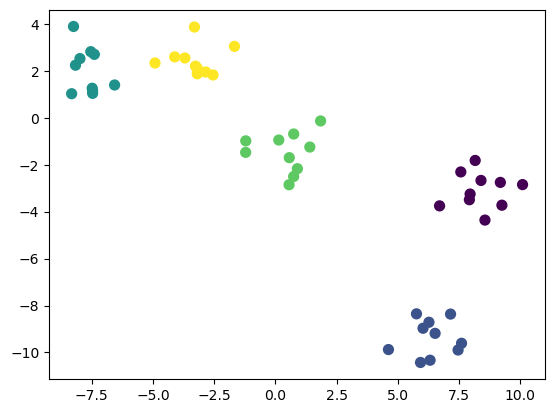

In [2]:
from sklearn.datasets import make_blobs

n_samples = 50
n_clusters = 5

X, y_true = make_blobs(n_samples=n_samples, centers=n_clusters, cluster_std=0.85, random_state=6)
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_true);

All samples of the same cluster are represented by the same colour. However, in unsupervised learning we do **not** know the labels of the datapoints `y_true`, i.e. their colour. Therefore, our example would look like this:

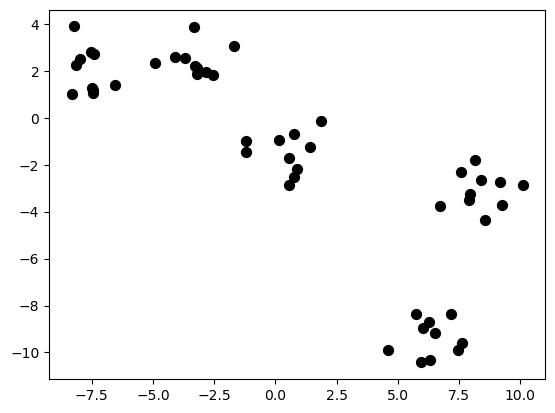

In [3]:
plt.scatter(X[:, 0], X[:, 1], s=50, c='black');

Determining clusters might be useful in a variety of applications. For instance, a point could represent a customer. The axes of the coordinate system might be features like previous purchases or activities on the website. Keep in mind that this tutorial focuses on two dimensional data for sake of visualisability, but clustering algorithms can deal with higher dimensional data. The data could be used to recommend products to a customer that similar customers liked, i.e. customers of the same cluster. Note that we don't need to assign labels to the customers for this purpose.

Clustering can also be used for *semi-supervised learning*. Supervised learning techniques have the drawback that they need labeled data, which might be hard or expensive to obtain. We could use the resources to label a few examples of each class to reach a situation like this:

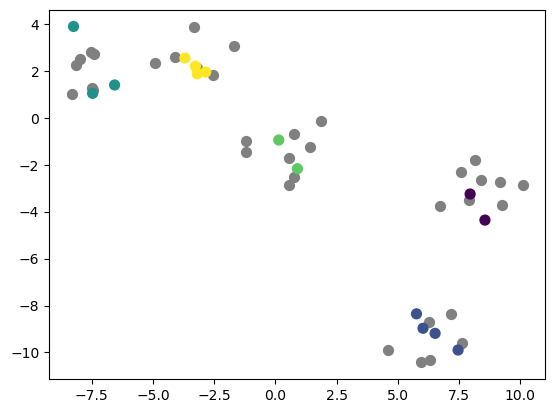

In [4]:
plt.scatter(X[15:, 0], X[15:, 1], s=50, c='gray')
plt.scatter(X[:15, 0], X[:15, 1], s=50, c=y_true[:15]);

Using clustering algorithms we can propagate the labels to the other points in the cluster. Thereby, we can improve the performance of the supervised learning algorithm using that dataset.

<a id="foundation"></a>
## 2. The Foundation of the KMeans Clustering Algorithm
This chapter introduces the mechanisms of the KMeans algorithm. In order to understand the content as well as possible, there will be highlighted questions like this:

> Use these as an incentive to pause for a moment and reflect on the content so far before reading along with the answer.

Scikit-learn provides a good implementation for KMeans which is easy to use. We can use the function `fit_predict(X)` to get the assignment of the samples by the KMeans algorithm visualized on the right side. The left plot shows the ground truth `y_true` we obtained from the creation process above.

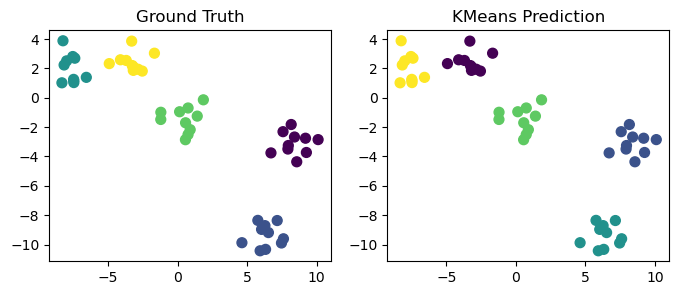

In [5]:
from sklearn.cluster import KMeans

# KMeans Calculation
kmeans = KMeans(n_clusters=n_clusters)
y_pred = kmeans.fit_predict(X)

# Plotting
fig, axes = plt.subplots(1, 2, figsize=(8, 3))
axes[0].scatter(X[:, 0], X[:, 1], s=50, c=y_true)
axes[0].set_title("Ground Truth")
axes[1].scatter(X[:, 0], X[:, 1], s=50, c=y_pred)
axes[1].set_title("KMeans Prediction");

The colours of the clusters depend on the assigned index. Since the index has no further meaning *(as it is not a label!)*, the indices of the clusters and thereby their colour is irrelevant. 

> Can you spot what might be problematic in the two lines of code for the KMeans calculations?

We have to determine how many clusters we want in advance. Here, we knew that there are five clusters either by the dataset creation process in the beginning or by looking at the graph. In practice we do not necessarily know how many clusters there are and plotting might not be feasable with higher dimensions. How this problem can be handled is not in the scope of this tutorial. <a href="https://towardsdatascience.com/how-many-clusters-6b3f220f0ef5">Here</a> you can find more informations.

<a id="core"></a>
### 2.1 The Core of the KMeans Algorithm
To form clusters, KMeans tries to find their centers. When a datapoint shall be assigned to a cluster, the cluster with the closest center is chosen. Since we do not know the centers of the clusters, KMeans starts with random values to begin with. There are different strategies to do this, for instance, we could pick samples from the dataset, in our case five, as we want five clusters.  

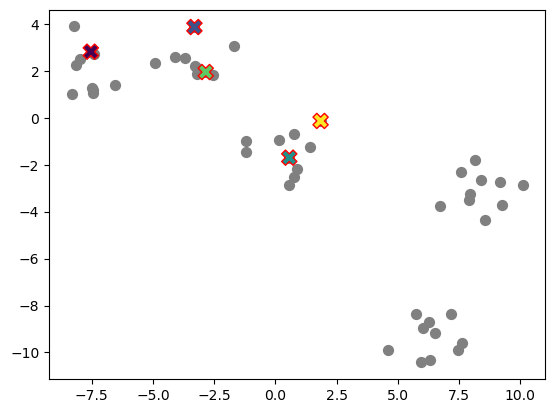

In [6]:
import random

random.seed(0)
indices = random.sample(range(n_samples), n_clusters)
init_centers = X[indices,:]

plt.scatter(X[:, 0], X[:, 1], s=50, c='gray')
plt.scatter(init_centers[:, 0], init_centers[:, 1], s=120, marker='X', edgecolors='red', c=range(5));

Next, KMeans assigns each datapoint to the closest centers. We can show this by calculating the euclidean distances between the datapoints and the initial values for the centers. The function `argmin` returns the index with the smallest distance.

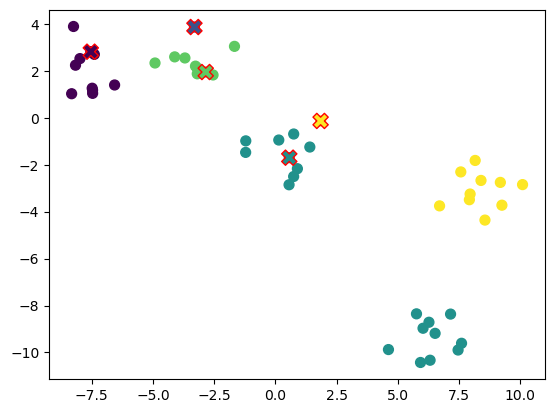

In [7]:
from sklearn.metrics.pairwise import euclidean_distances

y_pred = euclidean_distances(X, init_centers).argmin(axis=1)

plt.scatter(X[:, 0], X[:, 1], s=50, c=y_pred)
plt.scatter(init_centers[:, 0], init_centers[:, 1], s=120, marker='X', edgecolors='red', c=range(5));

Now, we can recalculate the values of the centers such that they are again in the center of their assigned datapoints. This process of assigning samples to centers and recalculating the values of the centers is repeatet until the assignment does not change anymore or when a maximum number of iterations is reached. The following animation shows how this would look like in our example. How this animation can be produced, is explained later.

<img src="kmeans_good_example.gif" align="left">

After just a few steps, KMeans could assign each sample to its corresponding blob in the ground truth. Keep in mind that we only have the ground truth because we artificially created the data in the beginning. 

> Does KMeans always find the optimal solution?

KMeans as described here does not always find the optimal solution. The critical part is the initialization of the centers to start with. Here we got lucky or to be more precise, the random seed was happily chosen. If we run the same procedure as above but with this time with the seed `5` rather than `0`, the algorithm gets stuck in a local optimum.

In [8]:
random.seed(5)
indices = random.sample(range(n_samples), n_clusters)
init_centers_bad = X[indices,:]

<img src="kmeans_bad_init.gif" align="left">

<a id="improvements"></a>
### 2.2 Some Improvements to the KMeans Algorithm
The KMeans algorithm as implemented in scikit-learn uses two factors to improve the probability of reaching the optimal solution. First, it executes not one but several runs with different values for the initial centers and picks the best run. The number of runs can be set by the parameter `n_init`, default is `10`.

In [9]:
kmeans = KMeans(n_clusters=n_clusters, n_init=10)
y_pred = kmeans.fit_predict(X)

As KMeans shall return the best run, we need a metric to determine how good the clustering of a run is.

> How can we measure how good a clustering assignment is?

We could calculate `y_pred` after each iteration and compare it to the ground truth `y_true`, regarding how many samples are correctly clustered together. If you have not spotted the flaw in the last sentence, read it again!

We do not have the ground truth, that is the point of clustering. Instead we could calculate the squared distance of each sample to the centers of its assigned cluster. The sum of those values is called the *inertia* of the model.

In [10]:
def calculate_inertia(centers):
    euclidean_dis = euclidean_distances(X, centers)
    inertia_value = sum(euclidean_dis.min(axis=1) ** 2)
    return inertia_value

The *inertia* can be accessed via the attribute `inertia_` of the KMeans object after fitting. For this we initialize two KMeans objects. We can pass our own values for the initial centers by the `init` parameter rather than letting the KMeans object choose its own. The parameter `n_init` determines how many runs the KMeans instance shall try. Since we pass our own centers values, we do not need more than one run.

In [11]:
kmeans_good = KMeans(n_clusters=n_clusters, n_init=1, init=init_centers)
kmeans_good.fit(X)
print(f"KMeans with good initial centers: {round(kmeans_good.inertia_, 2)}")

kmeans_bad = KMeans(n_clusters=n_clusters, n_init=1, init=init_centers_bad)
kmeans_bad.fit(X)
print(f"KMeans with bad initial centers: {round(kmeans_bad.inertia_, 2)}")

KMeans with good initial centers: 62.74
KMeans with bad initial centers: 154.02


The following animation compares the two runs from before and visualizes their inertia values per iteration.

<img src="kmeans_inertia_compare.gif" align="left">

Notice that calculating the intertia value of the initial centers does not necessarily tell how successful the run will be, as the right run has a lower inertia value at the beginning. Furthermore, we do not need to calculate the inertia after each iteration. It would be sufficient to calculate it once, when the cluster centers are not moving anymore.

The second improvement to the base KMeans algorithm is a smarter way of choosing the initial center values:
1. Choose a random sample to be the first center.
2. Take another sample as the next center. The probability of choosing a sample $x_i$ is $P(x_i) = \frac{(D(x_i))^2}{\sum_{j = 1}^{m} (D(x_j))^2}$, where $D(x_i)$ is the distance of the sample $x_i$ to its closest center and $m$ is the number of samples. Thereby, a sample is more likely to be chosen as a new center, if it is further away from the already chosen center values.
3. Repeat step 2 until all cluster centers are chosen.

> Do you recognize the this sum $\sum_{j = 1}^{m} (D(x_j))^2$ from the calculation above?

The sum is equivalent to the calculation of the inertia value. This initialization technique is called KMeans++ and the default in the scikit-learn implementation. It can be explicitely set by passing `'k-means++'` to the `init` parameter. Other options are `'random'` for the trivial initialiazation technique or to pass an array of self chosen initial center values as seen before.

In [12]:
kmeans = KMeans(n_clusters=n_clusters, init='k-means++')

<a id="animation"></a>
## 3. Animation of the KMeans Algorithm

To do the animations you have seen above, we use animation package of Matplotlib `matplotlib.animation`. For this tutorial we will investigate how to use the `FuncAnimation` class. 

In [13]:
from matplotlib import animation

<a id="sceleton"></a>
### 3.1 The Sceleton of the Animation
At first, let's look at the core elements we need for the animation. At first we create a figure and the plots we want in our animation. The idea of the matplotlib animation framework is that there is only one plot which we adjust rather than plotting every frame. Therefore, we need a reference to our plot, here `sample_plot` and we must plot on the axis `ax` and not to `plt`!

`%%capture out` *is needed to prevent jupyter from plotting automatically after each block. This is needed for demonstration purpose only.* 

In [14]:
%%capture out

fig, ax = plt.subplots()
sample_plot = ax.scatter(X[:, 0], X[:, 1], s=50, c='gray')

Next, we implement the functions for the animation. Both return a sequence of artists, in this case the `sample_plot`. The `init()` function can be used to draw static elements such as a background. We do not need this in this tutorial and will leave it out in the future. The `animate(i)` function is called before each frame, where `i` is the frame number. To make a simple demo animation, `y_random` simulates a random assignment of all samples to a cluster. The colour of the samples in the plot can be adjusted with `set_array`. Note that we do not plot another scatter plot but adjust the properties of the original one.

In [15]:
def init():
    return sample_plot,

def animate(i):
    y_random = np.random.choice(n_clusters, n_samples)
    sample_plot.set_array(y_random)
    
    return sample_plot,

Now we can initialize the `FuncAnimation` instance. The parameter `blit=True` specifies that only the changing artists are re-drawn, which potentially saves a lot of time. For more information see the <a href="https://matplotlib.org/stable/api/animation_api.html">documentation</a>.

Finally, we can export the export the animation. In this tutorial we will create gifs with one fps and view our result.

In [16]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=4, blit=True)

writergif = animation.PillowWriter(fps=1)
anim.save("demo.gif", writer=writergif)

<img src="demo.gif" align="left">

<a id="basic"></a>
### 3.2 A Basic KMeans Animation

To create the basic KMeans animation from Section 2.1, we start as before by creating a new figure and the plots. This time we need an additional plot `centers_plot` for the the centers positions. For convenience, the variables `y_pred` and `centers` store the information for the next update. Furthermore, the `zorder` attribute is set such that the centers are drawn on top of the samples.

In [17]:
%%capture out

y_pred = None
centers = init_centers

fig, ax = plt.subplots()

sample_plot = ax.scatter(X[:, 0], X[:, 1], s=50, c='gray', zorder=1)
center_plot = ax.scatter(centers[:, 0], centers[:, 1], s=120, marker='X', edgecolors='red', c=range(5), zorder=2)

For the animation, we need the center positions and prediction values after each iteration, but we can only access this information of the final clustering using the `KMeans` instance. However, the parameter `max_iter` sets an upper limit for the `KMeans` object regardless of if the clustering is finished or not. By setting this parameter to one and putting the current center values, we can simulate one iteration.

In [18]:
kmeans = KMeans(n_clusters=n_clusters, max_iter=1, n_init=1, init=centers)

There is one exeption though: `KMeans` will not accept `max_iter=0` to get the initial prediciton `y_pred`, so we have to calculate it ourselves using the euclidian distance as shown in Section 2.1:

In [19]:
def exec_kmeans(iteration):
    global y_pred
    global centers
    if iteration == 0:
        y_pred = euclidean_distances(X, init_centers).argmin(axis=1)
    else:
        kmeans = KMeans(n_clusters=n_clusters, max_iter=1, n_init=1, init=centers)
        y_pred = kmeans.fit_predict(X)
        centers = kmeans.cluster_centers_

The animation step distinguishes two steps now: moving the centers and changing the assignments. We can structure the code by introducing additional functions. Note that one kmeans-iteration consists of two animation steps. Therefore, the current iteration is `i / 2`.

In [20]:
def move_centers():
    center_plot.set_offsets(centers)

def change_assignment():
    sample_plot.set_array(y_pred)

def animate(i):
    if i % 2 == 0:
        iteration = int(i / 2)
        exec_kmeans(iteration)
        move_centers()
    else:
        change_assignment()
    
    return sample_plot, center_plot

Creating the animation and saving stays the same, just the number of frames are adjusted.

In [21]:
anim = animation.FuncAnimation(fig, animate, frames=10, blit=True)

writergif = animation.PillowWriter(fps=1) 
anim.save("kmeans_good_example.gif", writer=writergif)

<img src="kmeans_good_example.gif" align="left">

<a id="inertia"></a>
### 3.3 KMeans with Inertia Animation

To obtain the kmeans animation with inertia, we can follow the same procedure as before. Add additional plots for the lines between the samples and the centers. Then update the `animate` function. As with the cluster assignment, before the first iteration the `KMeans` instance does not provide the inertia value of the model for the start situation. Therefore, it is calculated by hand with the formula introduced in Section 2.3 in `calculate_inertia`.

In [22]:
def exec_kmeans(iteration):
    # [...]
    if iteration == 0:
        euclidean_dis = euclidean_distances(X, init_centers)
        # [...]
        inertia_value = sum(euclidean_dis.min(axis=1) ** 2)
    else:
        # [...]
        inertia_value = kmeans.inertia_

The animation function contains four steps now:
1. Execute KMeans and move the centers.
2. Colour the samples according to their assigned cluster.
3. Draw the inertia visualization lines.
4. Put the inertia lines in the background.

In [23]:
def animate(i):
    if i % 4 == 0:
        iteration = int(i / 4)
        exec_kmeans(iteration)
        move_centers()
    elif i % 4 == 1:
        change_assignment()
    elif i % 4 == 2:
        draw_inertia()
    else:
        inertia_background()
    
    return sample_plot, center_plot

Finally, we can put all together and structure the code with classes.

In [24]:
%%capture out

class KMeansPlot():
    def __init__(self, ax, seed):
        random.seed(seed)
        indices = random.sample(range(n_samples), n_clusters)
        self.init_centers = X[indices,:]
        self.centers = self.init_centers
        self.y_pred = None
        inertia_value = None

        self.sample_plot = ax.scatter(X[:, 0], X[:, 1], s=50, c='gray', zorder=1)
        self.center_plot = ax.scatter(self.centers[:, 0], self.centers[:, 1], s=120, marker='X', edgecolors='red', c=range(5), zorder=2)

        self.inertia_plots = []
        for i in range(len(X)):
            line, = ax.plot([], [], c='black', zorder=0)
            self.inertia_plots.append(line)

        self.inertia_plots[0].set_label("Inertia: -")
        self.legend = ax.legend(loc=1)

    def exec_kmeans(self, iteration):
        if iteration == 0:
            euclidean_dis = euclidean_distances(X, self.centers)
            self.y_pred = euclidean_dis.argmin(axis=1)
            self.inertia_value = sum(euclidean_dis.min(axis=1) ** 2)
        else:
            kmeans = KMeans(n_clusters=n_clusters, max_iter=1, n_init=1, init=self.centers)
            self.y_pred = kmeans.fit_predict(X)
            self.centers = kmeans.cluster_centers_
            self.inertia_value = kmeans.inertia_

    def draw_inertia(self):
        for line, sample, cluster_index in zip(self.inertia_plots, X, self.y_pred):
            center = self.centers[cluster_index]
            line.set_data([sample[0], center[0]], [sample[1], center[1]])
            line.set_color('black')
            line.set_linestyle('-')
        self.legend.get_texts()[0].set_text(f"Inertia: {round(self.inertia_value, 2)}")
    
    def inertia_background(self):
        for line in self.inertia_plots:
            line.set_color('gray')
            line.set_linestyle(':')

    def move_centers(self):
        self.center_plot.set_offsets(self.centers)

    def change_assignment(self):
        self.sample_plot.set_array(self.y_pred)

    def animate(self, i):
        if i % 4 == 0:
            iteration = int(i / 4)
            self.exec_kmeans(iteration)
            self.move_centers()
        elif i % 4 == 1:
            self.change_assignment()
        elif i % 4 == 2:
            self.draw_inertia()
        else:
            self.inertia_background()

        return self.sample_plot, self.center_plot


class InertiaPlot():
    def __init__(self, ax, left_kmeans, right_kmeans, n_iter):
        self.left_values = []
        self.right_values = []
        self.iterations = np.arange(n_iter + 1)
        
        self.left_kmeans = left_kmeans
        self.right_kmeans = right_kmeans
        
        self.left_kmeans.exec_kmeans(0)
        self.right_kmeans.exec_kmeans(0)
        max_inertia = max(self.left_kmeans.inertia_value, self.right_kmeans.inertia_value)
        
        ax.set_xlim([0, n_iter])
        ax.set_ylim([0, max_inertia])
        
        self.left_plot, = ax.plot([], [], marker='.', markersize=10, label="Left")
        self.right_plot, = ax.plot([], [], marker='.', markersize=10, label="Right")
        ax.legend()
        
    def animate(self, i):
        if i % 4 == 2:
            self.left_values.append(self.left_kmeans.inertia_value)
            self.right_values.append(self.right_kmeans.inertia_value)

            self.left_plot.set_data(self.iterations[:len(self.left_values)], self.left_values)
            self.right_plot.set_data(self.iterations[:len(self.right_values)], self.right_values)
        
        return self.left_plot, self.right_plot
        

fig, ax = plt.subplots(1, 3, figsize=(13, 4))
kmeans_good = KMeansPlot(ax[0], seed=0)
kmeans_bad = KMeansPlot(ax[2], seed=5)
inertia_plot = InertiaPlot(ax[1], kmeans_good, kmeans_bad, 4)

def animate(i):
    return kmeans_good.animate(i) + kmeans_bad.animate(i) + inertia_plot.animate(i)

anim = animation.FuncAnimation(fig, animate, frames=21, blit=True)

writergif = animation.PillowWriter(fps=1) 
anim.save("kmeans_inertia_compare.gif", writer=writergif)

<img src="kmeans_inertia_compare.gif" align="left">